### following folder must be in the base_path, written in the same way:
#### QuPath
#### Images
#### Annotations

### Set up base_path and labels here:

In [5]:
# autoreload
%load_ext autoreload
%autoreload 2

if False:
    base_path = r"F:\Annemarie\CRPS_DL\QuPath_P3\run_2"
    labels = ['Carpal', 'Metacarpal', 'Phalangeal']
elif False:
    base_path = r"F:\Annemarie\CRPS_DL\QuPath_P1-2\run_3"
    labels = ['whole hand']
else:
    base_path = r"F:\Annemarie\CRPS_DL\foot\merge"
    labels = ['whole foot']

#base_path = "\\\\NAS6B755D/Public/Annemarie/Glia Dataset/"
#labels = ['DAPI', 'NF', 'FABP7', 'APOJ']

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### advanced settings

In [6]:
project_data_dict = {
    "base_path": base_path,
    "out_classes": ["cell", None, None, None],
    "mode": "brightfield, fluorescence",
    "max_signal": 2**12,
    "different_pages": False,
    "one_channel": False,
    "downscale": 1,
    "channels":[0],
    "use_regions":False
}

### Loading and splitting data

Loading data:


  0%|          | 0/33 [00:00<?, ?it/s]

split into training: 26, and validation: 7
split into training: 23, valid: 6, and testing: 4
CRPS026P3.tif


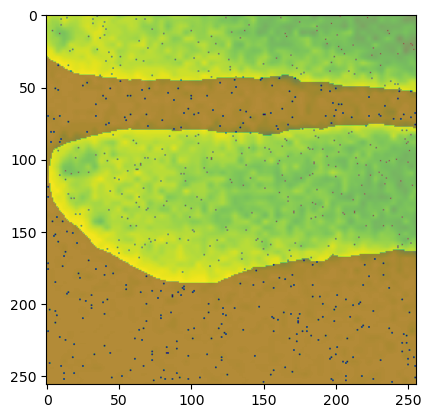

In [7]:
from dataloader_ml import DataLoader

data = DataLoader(base_path, labels, project_data_dict)
# run this if you want to change the train/valid ratio of 0.2:
# data.train_valid_split(ratio=0.1)
# run this if you want to test on unseen data
data.train_test_split(test_ratio=0.1, valid_ratio=0.2)

# kernel_size and batch_size can be adjusted
data.run_data_loader()

# run this if you want to see an example batch
data.show_example_batch()

### Training model
#### you will find the best model and its metrices in 'base_path'/model

In [9]:
from segmagic_ml import Segmagic

seg = Segmagic(base_path)
seg.train_model(data, wandb_log=True, project='segmagic', entity='anmschulte')

C:\Users\emsch\anaconda3\Lib\site-packages\torchaudio\backend\utils.py:74: UserWarning: No audio backend is available.
  warnings.warn("No audio backend is available.")


Encoder parameters: 28340784
Decoder parameters: 2875072
Segmentation head parameters: 145


C:\Users\emsch\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\emsch\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG11_Weights.IMAGENET1K_V1`. You can also use `weights=VGG11_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
wandb: Currently logged in as: anmschulte. Use `wandb login --relogin` to force relogin


C:\Users\emsch\anaconda3\Lib\site-packages\lightning_fabric\connector.py:554: UserWarning: 16 is supported for historical reasons but its usage is discouraged. Please set your precision to 16-mixed instead!
  rank_zero_warn(
Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\emsch\anaconda3\Lib\site-packages\pytorch_lightning\trainer\connectors\logger_connector\logger_connector.py:67: UserWarning: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default
  warning_cache.warn(
LOCAL_RANK: 0 - C

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

C:\Users\emsch\anaconda3\Lib\site-packages\torch\optim\lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


Validation: 0it [00:00, ?it/s]


Saving model for epoch 1 for best validation F1: 0.04918207677819909


Validation: 0it [00:00, ?it/s]


Saving model for epoch 2 for best validation F1: 0.6281836092912336


Validation: 0it [00:00, ?it/s]


Saving model for epoch 3 for best validation F1: 0.8271412874647238


Validation: 0it [00:00, ?it/s]


Saving model for epoch 4 for best validation F1: 0.8700102839935155


Validation: 0it [00:00, ?it/s]


Saving model for epoch 5 for best validation F1: 0.9009732340578822


Validation: 0it [00:00, ?it/s]


Saving model for epoch 6 for best validation F1: 0.9055164018887771


Validation: 0it [00:00, ?it/s]


Saving model for epoch 7 for best validation F1: 0.915179626268067


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]


Saving model for epoch 9 for best validation F1: 0.92884988363904


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]


Saving model for epoch 15 for best validation F1: 0.9371978724427488


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]


Saving model for epoch 22 for best validation F1: 0.9450770139554417


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

C:\Users\emsch\anaconda3\Lib\site-packages\pytorch_lightning\trainer\call.py:53: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")


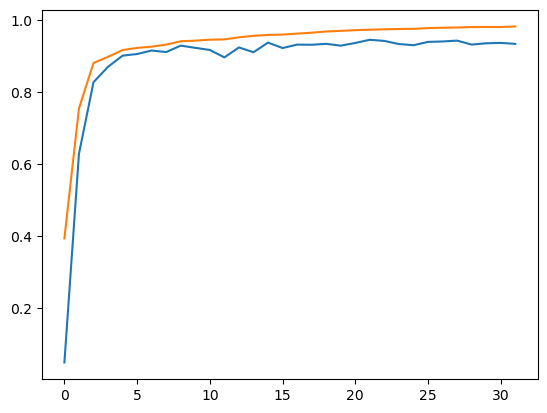

In [10]:
import matplotlib.pyplot as plt
plt.plot(seg.model.tml.metrics['val_f1'].history['micro'])
plt.plot(seg.model.tml.metrics['train_f1'].history['micro'])

In [24]:
from segmagic_ml import Segmagic

seg = Segmagic(base_path)
seg.train_model_ensemble(3, data, epochs=50, wandb_log=True, project='segmagic', entity='anmschulte')

split into training: 23, valid: 6, and testing: 4
CRPS059P1.tif
Encoder parameters: 28340784
Decoder parameters: 2875072
Segmentation head parameters: 145


C:\Users\emsch\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\emsch\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG11_Weights.IMAGENET1K_V1`. You can also use `weights=VGG11_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


train_f1_fn,█▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_f1_fp,█▅▃▂▂▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_f1_macro,▁▄▆▇▇▇▇▇▇▇▇█████████████████████████████
train_f1_micro,▁▄▆▇▇▇▇▇▇▇██████████████████████████████
train_f1_precision,▁▃▆▇▇▇▇▇▇▇▇▇▇███████████████████████████
train_f1_recall,▁▇█▇████████████████████████████████████
train_f1_soft_micro,▁▂▃▄▅▆▆▆▇▇▇▇▇▇▇▇▇▇██████████████████████
train_f1_tp,▁▇██▇▇▇▇▇▇█▇█▇███▇█████▇▇████▇█▇██████▇█
train_f1_whole hand_fn,█▂▁▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_f1_whole hand_fp,█▆▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_f1_whole hand_macro,▁▄▆▇▇▇▇▇▇▇▇█████████████████████████████


C:\Users\emsch\anaconda3\Lib\site-packages\lightning_fabric\connector.py:554: UserWarning: 16 is supported for historical reasons but its usage is discouraged. Please set your precision to 16-mixed instead!
  rank_zero_warn(
Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type      | Params
------------------------------------
0 | model | SCUnet    | 31.2 M
1 | loss  | FocalLoss | 0     
------------------------------------
31.2 M    Trainable params
0         Non-trainable params
31.2 M    Total params
124.864   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

C:\Users\emsch\anaconda3\Lib\site-packages\torch\optim\lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


Validation: 0it [00:00, ?it/s]


Saving model for epoch 1 for best validation F1: 0.6172046312447933


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]


Saving model for epoch 3 for best validation F1: 0.768417662314483


Validation: 0it [00:00, ?it/s]


Saving model for epoch 4 for best validation F1: 0.803288417207091


Validation: 0it [00:00, ?it/s]


Saving model for epoch 5 for best validation F1: 0.8317529034039302


Validation: 0it [00:00, ?it/s]


Saving model for epoch 6 for best validation F1: 0.8960740733394983


Validation: 0it [00:00, ?it/s]


Saving model for epoch 7 for best validation F1: 0.9181252942571191


Validation: 0it [00:00, ?it/s]


Saving model for epoch 8 for best validation F1: 0.9238759770475157


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]


Saving model for epoch 10 for best validation F1: 0.923916109745121


Validation: 0it [00:00, ?it/s]


Saving model for epoch 11 for best validation F1: 0.927516378796903


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]


Saving model for epoch 15 for best validation F1: 0.9313677100315246


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]


Saving model for epoch 18 for best validation F1: 0.9342391398897026


Validation: 0it [00:00, ?it/s]


Saving model for epoch 19 for best validation F1: 0.934323118511606


Validation: 0it [00:00, ?it/s]


Saving model for epoch 20 for best validation F1: 0.9379285516691833


Validation: 0it [00:00, ?it/s]


Saving model for epoch 21 for best validation F1: 0.9397124247820827


Validation: 0it [00:00, ?it/s]


Saving model for epoch 22 for best validation F1: 0.9400924765184557


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]


Saving model for epoch 24 for best validation F1: 0.9432067376832616


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]


Saving model for epoch 27 for best validation F1: 0.9440733190007763


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]


Saving model for epoch 29 for best validation F1: 0.9466087674785346


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]


Saving model for epoch 31 for best validation F1: 0.9484438846358102


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]


Saving model for epoch 36 for best validation F1: 0.9498169139076703


Validation: 0it [00:00, ?it/s]


Saving model for epoch 37 for best validation F1: 0.950538288879034


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]


Saving model for epoch 44 for best validation F1: 0.9514367752741304


Validation: 0it [00:00, ?it/s]


Saving model for epoch 45 for best validation F1: 0.9532107482770931


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.


split into training: 23, valid: 6, and testing: 4
CRPS053P1.tif
Encoder parameters: 28340784
Decoder parameters: 2875072
Segmentation head parameters: 145


C:\Users\emsch\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\emsch\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG11_Weights.IMAGENET1K_V1`. You can also use `weights=VGG11_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


train_f1_fn,█▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_f1_fp,█▅▄▄▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_f1_macro,▁▅▆▇▇▇▇▇▇▇▇▇████████████████████████████
train_f1_micro,▁▅▆▇▇▇▇▇▇▇▇▇████████████████████████████
train_f1_precision,▁▄▅▆▆▆▇▇▇▇▇▇▇▇▇▇▇███████████████████████
train_f1_recall,▁▆▇▇████████████████████████████████████
train_f1_soft_micro,▁▂▃▄▅▅▆▆▆▇▇▇▇▇▇▇▇▇██████████████████████
train_f1_tp,▁▆▇▇▇▇█▇███▇████████████████████████████
train_f1_whole foot_fn,█▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_f1_whole foot_fp,█▆▄▄▃▃▂▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_f1_whole foot_macro,▁▅▆▆▇▇▇▇▇▇▇▇▇███████████████████████████


C:\Users\emsch\anaconda3\Lib\site-packages\lightning_fabric\connector.py:554: UserWarning: 16 is supported for historical reasons but its usage is discouraged. Please set your precision to 16-mixed instead!
  rank_zero_warn(
Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type      | Params
------------------------------------
0 | model | SCUnet    | 31.2 M
1 | loss  | FocalLoss | 0     
------------------------------------
31.2 M    Trainable params
0         Non-trainable params
31.2 M    Total params
124.864   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

C:\Users\emsch\anaconda3\Lib\site-packages\torch\optim\lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


Validation: 0it [00:00, ?it/s]


Saving model for epoch 1 for best validation F1: 0.8073089208636284


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]


Saving model for epoch 3 for best validation F1: 0.8169594517347065


Validation: 0it [00:00, ?it/s]


Saving model for epoch 4 for best validation F1: 0.8375021435863185


Validation: 0it [00:00, ?it/s]


Saving model for epoch 5 for best validation F1: 0.8783063862402264


Validation: 0it [00:00, ?it/s]


Saving model for epoch 6 for best validation F1: 0.8890388135044649


Validation: 0it [00:00, ?it/s]


Saving model for epoch 7 for best validation F1: 0.9100122745126834


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]


Saving model for epoch 9 for best validation F1: 0.9116901277191027


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]


Saving model for epoch 12 for best validation F1: 0.9181501440320978


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]


Saving model for epoch 14 for best validation F1: 0.9251899336809822


Validation: 0it [00:00, ?it/s]


Saving model for epoch 15 for best validation F1: 0.9321087453269136


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]


Saving model for epoch 25 for best validation F1: 0.9444404997176633


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]


Saving model for epoch 35 for best validation F1: 0.9455339371589014


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]


Saving model for epoch 38 for best validation F1: 0.9457234123857652


Validation: 0it [00:00, ?it/s]


Saving model for epoch 39 for best validation F1: 0.9464873332930304


Validation: 0it [00:00, ?it/s]


Saving model for epoch 40 for best validation F1: 0.948588342900285


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]


Saving model for epoch 44 for best validation F1: 0.9492812883965349


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.


split into training: 23, valid: 6, and testing: 4
CRPS016P2.tif
Encoder parameters: 28340784
Decoder parameters: 2875072
Segmentation head parameters: 145


C:\Users\emsch\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\emsch\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG11_Weights.IMAGENET1K_V1`. You can also use `weights=VGG11_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


train_f1_fn,█▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_f1_fp,█▅▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_f1_macro,▁▄▆▆▇▇▇▇▇▇▇▇▇▇▇█████████████████████████
train_f1_micro,▁▄▆▆▇▇▇▇▇▇▇▇▇▇▇█████████████████████████
train_f1_precision,▁▄▅▆▆▇▇▇▇▇▇▇▇▇▇▇████████████████████████
train_f1_recall,▁▆▆▆▇▇▇▇▇▇▇▇▇▇██████████████████████████
train_f1_soft_micro,▁▂▃▄▅▅▆▆▆▆▇▇▇▇▇▇▇▇▇▇████████████████████
train_f1_tp,▁▅▆▆▅▆▆▆▆▇▆▆▇▆▆▇▆▆▇▇▇▇▇█▆▇▇▇█▇▇▇▇▇▇▇▇▇▇▇
train_f1_whole foot_fn,█▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_f1_whole foot_fp,█▅▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_f1_whole foot_macro,▁▄▅▆▆▇▇▇▇▇▇▇▇▇▇█████████████████████████


C:\Users\emsch\anaconda3\Lib\site-packages\lightning_fabric\connector.py:554: UserWarning: 16 is supported for historical reasons but its usage is discouraged. Please set your precision to 16-mixed instead!
  rank_zero_warn(
Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type      | Params
------------------------------------
0 | model | SCUnet    | 31.2 M
1 | loss  | FocalLoss | 0     
------------------------------------
31.2 M    Trainable params
0         Non-trainable params
31.2 M    Total params
124.864   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

C:\Users\emsch\anaconda3\Lib\site-packages\torch\optim\lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


Validation: 0it [00:00, ?it/s]


Saving model for epoch 1 for best validation F1: 0.21008567640355755


Validation: 0it [00:00, ?it/s]


Saving model for epoch 2 for best validation F1: 0.8637086343241456


Validation: 0it [00:00, ?it/s]


Saving model for epoch 3 for best validation F1: 0.8704102495904656


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]


Saving model for epoch 5 for best validation F1: 0.906121204142057


Validation: 0it [00:00, ?it/s]


Saving model for epoch 6 for best validation F1: 0.9274933252042152


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]


Saving model for epoch 8 for best validation F1: 0.9305051699748476


Validation: 0it [00:00, ?it/s]


Saving model for epoch 9 for best validation F1: 0.9376442386891465


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]


Saving model for epoch 11 for best validation F1: 0.9386909988992597


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]


Saving model for epoch 14 for best validation F1: 0.943828683508857


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]


Saving model for epoch 17 for best validation F1: 0.9447840643146462


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]


Saving model for epoch 20 for best validation F1: 0.9457975862230328


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]


Saving model for epoch 23 for best validation F1: 0.9480053875253918


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]


Saving model for epoch 25 for best validation F1: 0.9526607039863738


Validation: 0it [00:00, ?it/s]


Saving model for epoch 26 for best validation F1: 0.9534464405901988


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]


Saving model for epoch 28 for best validation F1: 0.9543121349041072


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]


Saving model for epoch 30 for best validation F1: 0.9569979675070329


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.


### Testing model
#### Test results are stored under 'base_path'/Testing

  0%|          | 0/9 [00:00<?, ?it/s]

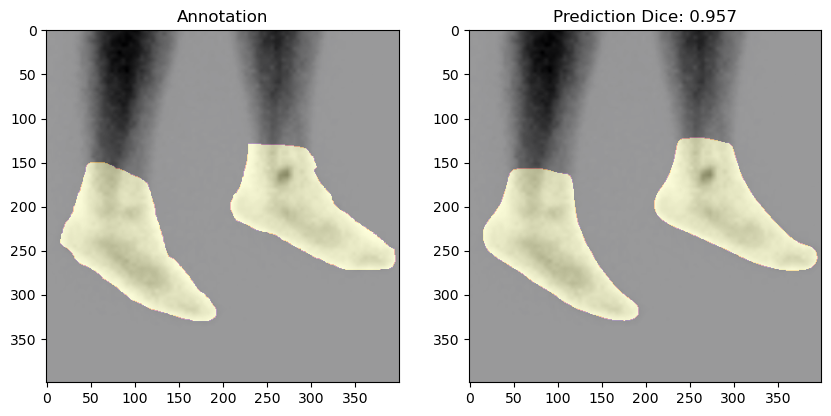

  0%|          | 0/9 [00:00<?, ?it/s]

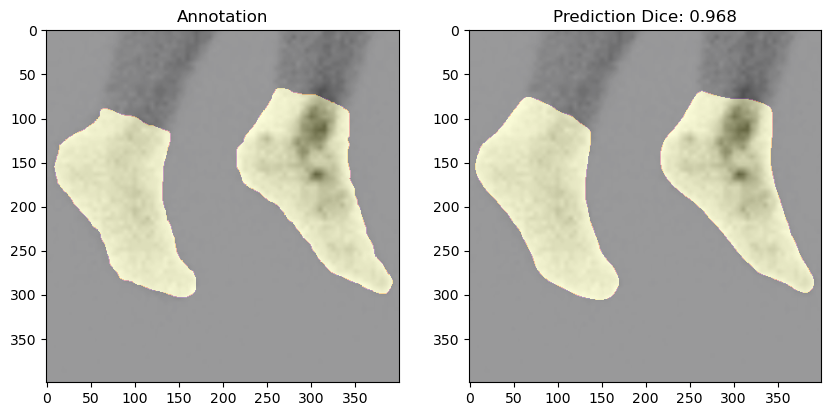

  0%|          | 0/9 [00:00<?, ?it/s]

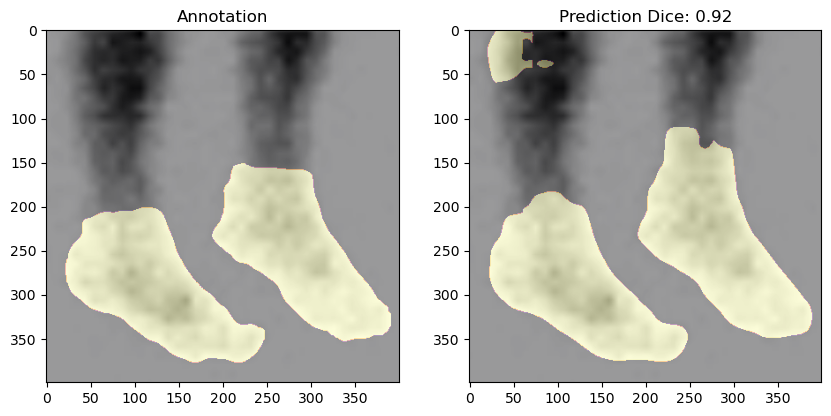

  0%|          | 0/9 [00:00<?, ?it/s]

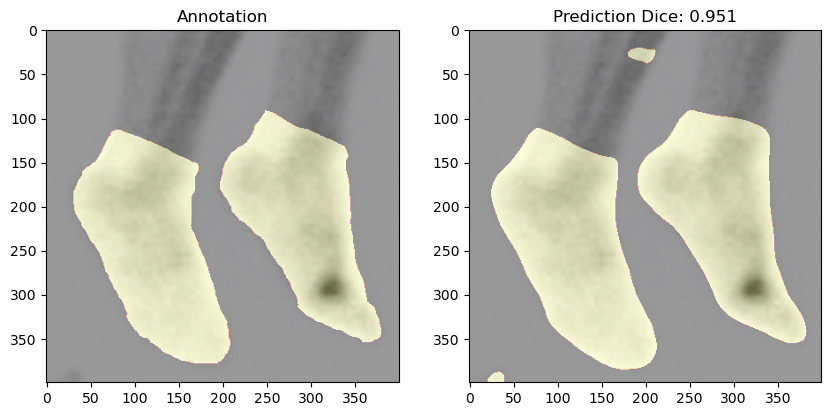

In [11]:
seg = Segmagic(base_path)
################## chose image to predict ##################
seg.test_images(data)
#seg.predict_image(image_to_predict, labels,show=True)

### Prediction on new data
#### results are stored under 'folder'_pred

  0%|          | 0/16 [00:00<?, ?it/s]

CRPS021P1.tif


  0%|          | 0/9 [00:00<?, ?it/s]

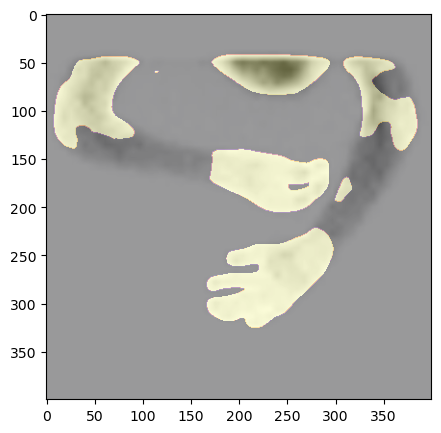

CRPS021P2.tif


  0%|          | 0/9 [00:00<?, ?it/s]

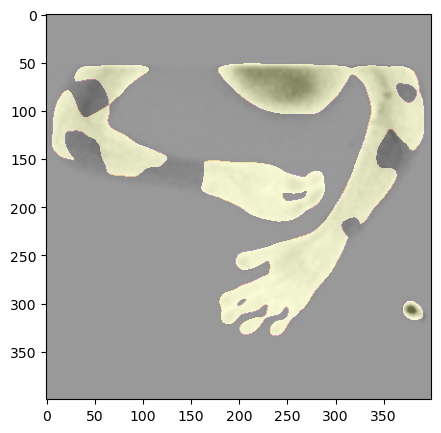

CRPS079P1.tif


  0%|          | 0/9 [00:00<?, ?it/s]

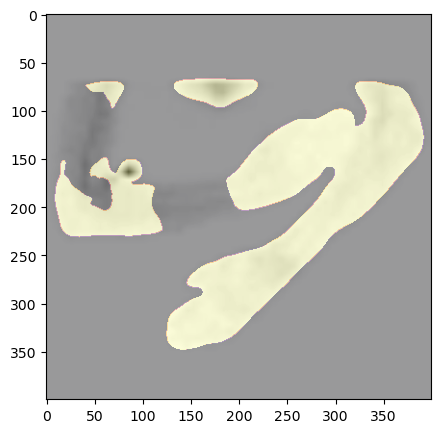

CRPS079P2.tif


  0%|          | 0/9 [00:00<?, ?it/s]

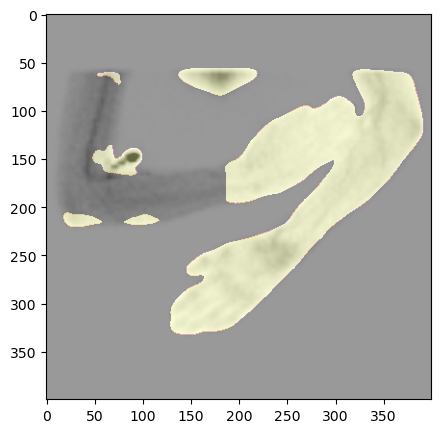

CRPS089P1.tif


  0%|          | 0/9 [00:00<?, ?it/s]

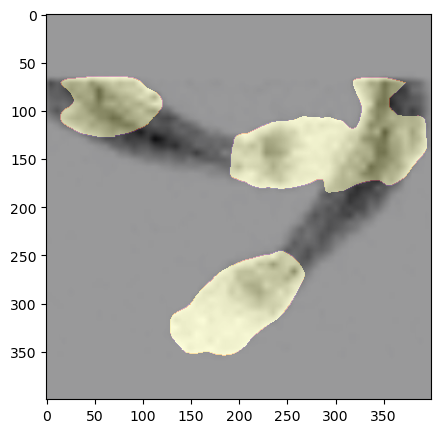

CRPS089P2.tif


  0%|          | 0/9 [00:00<?, ?it/s]

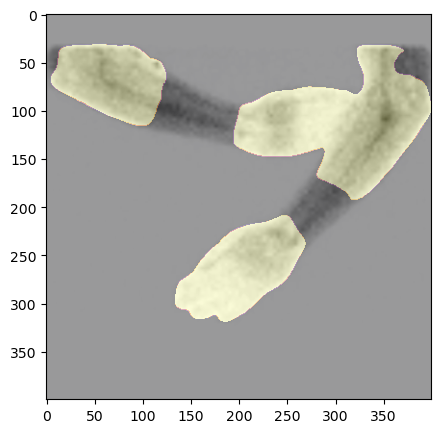

CRPS094P1.tif


  0%|          | 0/9 [00:00<?, ?it/s]

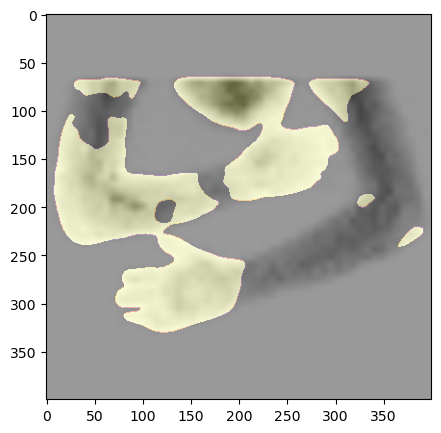

CRPS094P2.tif


  0%|          | 0/9 [00:00<?, ?it/s]

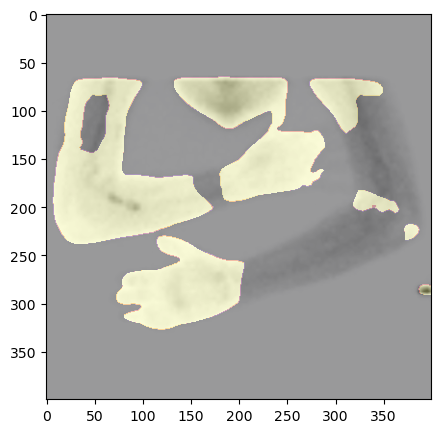

CRPS096P1.tif


  0%|          | 0/9 [00:00<?, ?it/s]

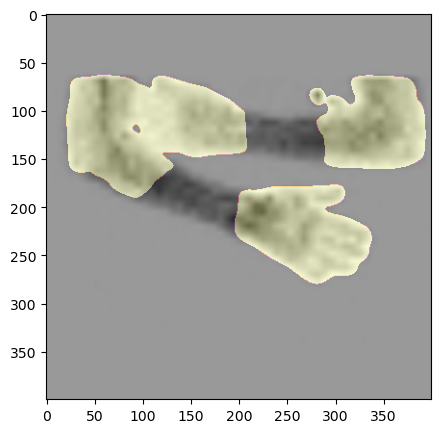

CRPS096P2.tif


  0%|          | 0/9 [00:00<?, ?it/s]

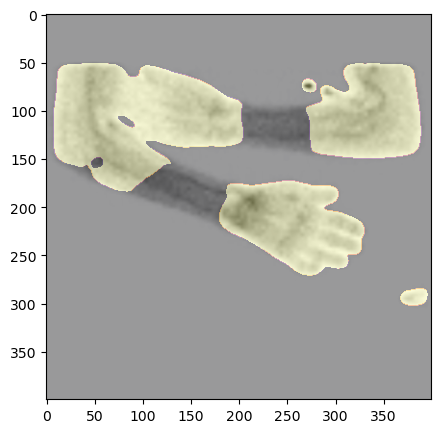

CRPS097P1.tif


  0%|          | 0/9 [00:00<?, ?it/s]

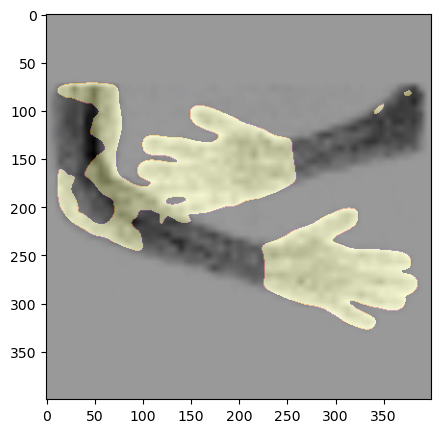

CRPS097P2.tif


  0%|          | 0/9 [00:00<?, ?it/s]

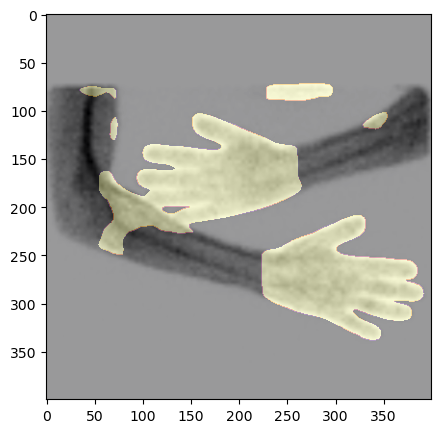

CRPS102P1.tif


  0%|          | 0/9 [00:00<?, ?it/s]

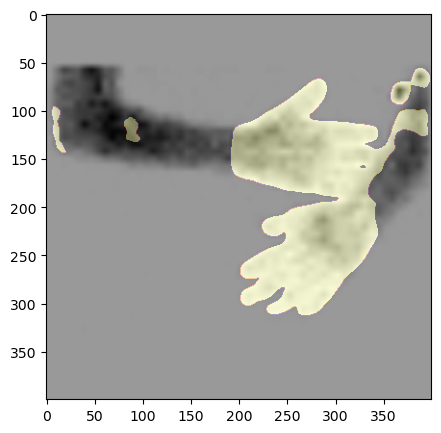

CRPS102P2.tif


  0%|          | 0/9 [00:00<?, ?it/s]

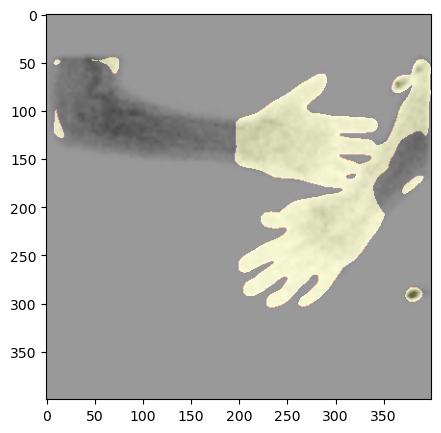

CRPS110P1.tif


  0%|          | 0/9 [00:00<?, ?it/s]

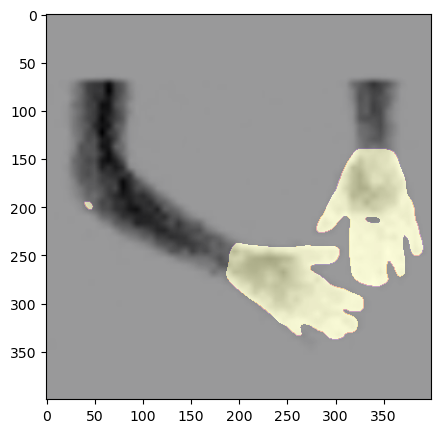

CRPS110P2.tif


  0%|          | 0/9 [00:00<?, ?it/s]

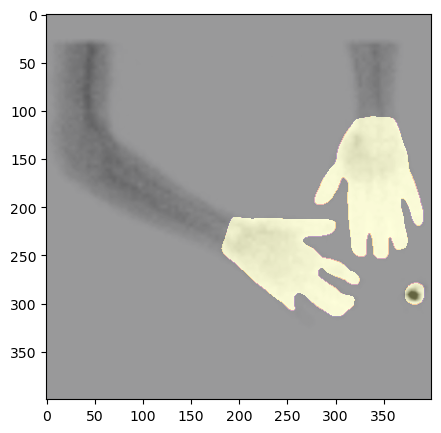

In [39]:
from segmagic_ml import Segmagic
seg = Segmagic(base_path)
################## chose image to predict ##################

#folder = r"F:\Annemarie\CRPS_DL\Data Prediction\Images_Validation__OE\Images_Validation_P1-2_OE"
#folder = r"F:\Annemarie\CRPS_DL\Data Prediction\Images_Validation_UE\Images_Validation_P1-2_UE"
#folder = r"F:\Annemarie\CRPS_DL\Data Prediction\Images_Training_UE\all"
# folder = r"F:\Annemarie\CRPS_DL\Data Prediction\Images_Training_OE\P3" 
folder = r"F:\Annemarie\CRPS_DL\Data Prediction\Images_Validation__OE\Images_Validation_P1-2_OE_gesondert"
#folder = r"F:\Annemarie\CRPS_DL\Data Prediction\Images_Validation__OE\Images_Validation_P3_OE_gesondert"
seg.predict_folder(folder,labels,show=True)